# Ozone vs airmass

- Goal check if files are filled correctly

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/11/17
- last update : 2024/11/17


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os,sys
import pickle
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
import getObsAtmo as obs

In [4]:
OBS_tag = 'LSST'

In [5]:
obs.__path__

['/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/getObsAtmo']

In [6]:
from getObsAtmo.getObsAtmo import ObsAtmo,Dict_Of_sitesPressures,getObsSiteDataFrame,_getPackageDir

In [7]:

__all__ = ['Dict_Of_sitesAltitudes',
           'Dict_Of_sitesPressures',
           'Dict_Of_sitesAliases',
           'file_data_dict',
           '_getPackageDir',
           'get_obssite_keys',
           'sanitizeString',
           'validateObsName', 
           'is_obssite', 
           'ObsAtmo','ObsAtmoPressure','ObsAtmoGrid']


# preselected sites
Dict_Of_sitesAltitudes = {'LSST': 2.663,
                          'CTIO': 2.207,
                          'OHP': 0.65,
                          'PDM': 2.8905,
                          'OMK': 4.205,
                          'OSL': 0.000,
                          }
# pressure calculated by libradtran
Dict_Of_sitesPressures = {'LSST': 731.50433,
                          'CTIO': 774.6052,
                          'OHP': 937.22595,
                          'PDM': 710.90637,
                          'OMK': 600.17224,
                          'OSL': 1013.000,
                          }

Dict_Of_sitesAliases = {'LSST': ['Rubin','Rubin Observatory','Auxtel'],
                        'CTIO': ["Cerro Tololo"],
                        'OHP': ["Observatoire de Haute Provence"],
                        'PDM': ["Pic du Midi","Observatoire du Pic du Midi"],
                        'OMK': ["Mauna Kea","Mauna Kea Observatory"],
                        'OSL': ["Sea Level","Sea Level Observatory"]
                        }

file_data_dict = {
    "info": "atmospherictransparencygrid_params.pickle",
    "data_rayleigh": "atmospherictransparencygrid_rayleigh.npy",
    "data_o2abs": "atmospherictransparencygrid_O2abs.npy",
    "data_pwvabs": "atmospherictransparencygrid_PWVabs.npy",
    "data_ozabs": "atmospherictransparencygrid_OZabs.npy",
}

In [8]:
# construct the path of input data file
path = os.path.join(_getPackageDir(), '../obsatmo_data')
info_params = {}

# load all data files (training and test)
filename = os.path.join(path, OBS_tag + "_" + file_data_dict["info"])
with open(filename, 'rb') as f:
    info_params = pickle.load(f)

data_rayleigh = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_rayleigh"]))
data_O2abs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_o2abs"]))
data_PWVabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_pwvabs"]))
data_OZabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_ozabs"]))

In [9]:
# setup training dataset (those used for interpolation)
WLMIN = info_params["WLMIN"]
WLMAX = info_params["WLMAX"]
WLBIN = info_params["WLBIN"]
NWLBIN = info_params['NWLBIN']
WL     = info_params['WL']
OBS = info_params['OBS']

AIRMASSMIN = info_params['AIRMASSMIN']
AIRMASSMAX = info_params['AIRMASSMAX']
NAIRMASS = info_params['NAIRMASS']
DAIRMASS = info_params['DAIRMASS']
AIRMASS = info_params['AIRMASS']

PWVMIN = info_params['PWVMIN']
PWVMAX = info_params['PWVMAX']
NPWV = info_params['NPWV']
DPWV = info_params['DPWV']
PWV = info_params['PWV']

OZMIN = info_params['OZMIN']
OZMAX = info_params['OZMAX']
NOZ = info_params['NOZ']
DOZ = info_params['DOZ']
OZ = info_params['OZ']


In [10]:
data_PWVabs.shape

(800, 17, 62)

In [11]:
data_PWVabs.min()

0.1355994

# Check information

In [12]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [13]:
obs_str = 'LSST'

In [14]:
emul =  ObsAtmo(obs_str=obs_str)

LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

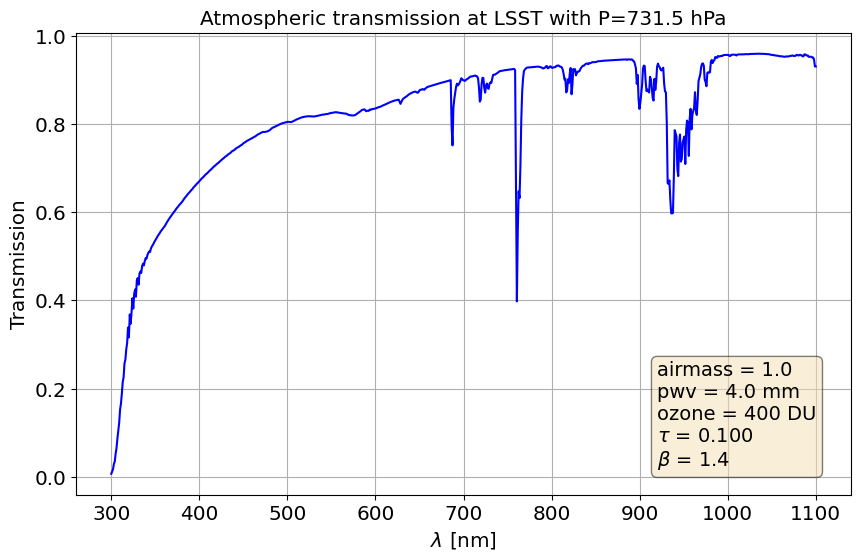

In [15]:
emul.plot_transmission()

# Setting atmospheric parameters

In [16]:
WL = emul.GetWL()
airmasses = emul.AIRMASS
NAM = len(airmasses)
pwvs = emul.PWV
NPWV = len(pwvs)
ozs = emul.OZ
NOZ = len(ozs)

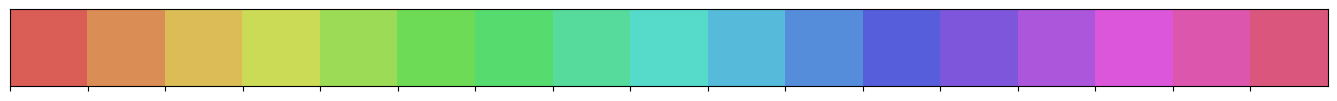

In [17]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Ozone absorption

- expect no difference

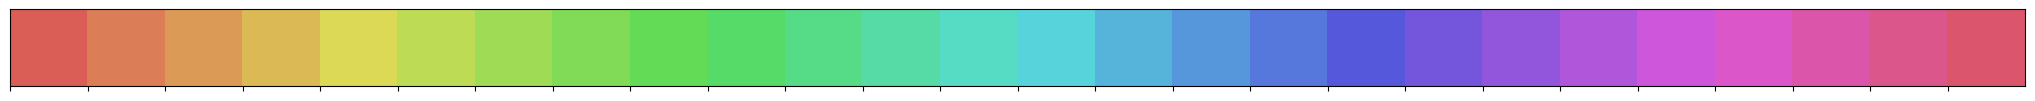

In [18]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


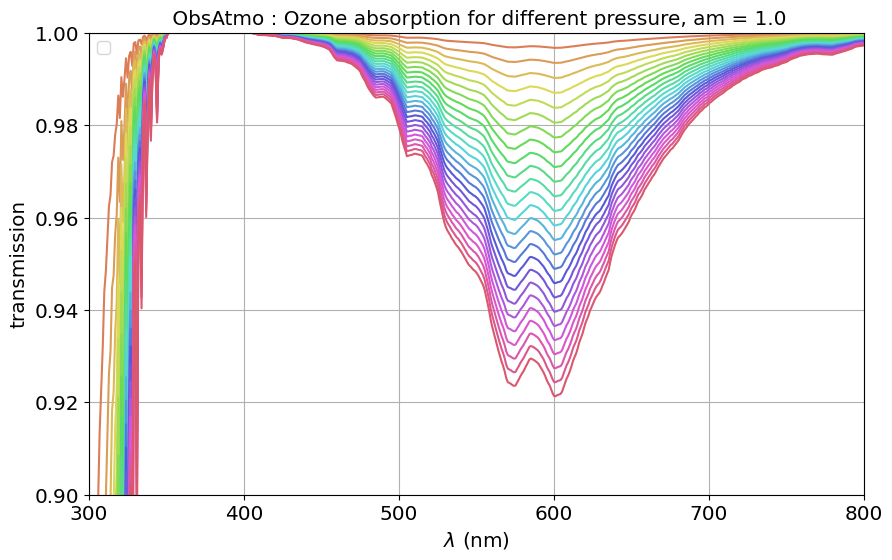

In [19]:
am =1

fig, ax = plt.subplots()
for idx,oz in enumerate(ozs):

    transm = emul.GetOZabsTransparencyArray(WL,am,oz)

    
    if idx == 0:
        ax.plot(WL,transm,"-",color=hls_colors[idx],label="")
    else:
        ax.plot(WL,transm,"-",color=hls_colors[idx])
     
title = f" ObsAtmo : Ozone absorption for different pressure, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Dependence with airmass

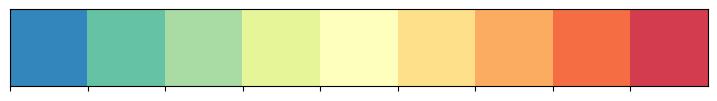

In [20]:
WLtest = np.arange(400,850,50)
NWLtest = len(WLtest)
hls_colors = sns.color_palette("Spectral_r", NWLtest)
sns.palplot(hls_colors)

In [21]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6])

In [22]:
oz0=100.
transmarray0 = np.zeros((NAM,NWLtest))
for idx,airmass in enumerate(airmasses):
    transmarray0[idx,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
for idx,airmass in enumerate(airmasses):
     transmarray0[idx,:] =  transmarray0[idx,:]/transmarray0[0,:]

In [23]:
oz0=300.
transmarray1 = np.zeros((NAM,NWLtest))
for idx,airmass in enumerate(airmasses):
    transmarray1[idx,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
for idx,airmass in enumerate(airmasses):
     transmarray1[idx,:] =  transmarray1[idx,:]/transmarray1[0,:]

In [24]:
oz0=600
transmarray2 = np.zeros((NAM,NWLtest))
for idx,airmass in enumerate(airmasses):
    transmarray2[idx,:]  = emul.GetOZabsTransparencyArray(WLtest,airmass,oz0)
for idx,airmass in enumerate(airmasses):
     transmarray2[idx,:] =  transmarray2[idx,:]/transmarray2[0,:]

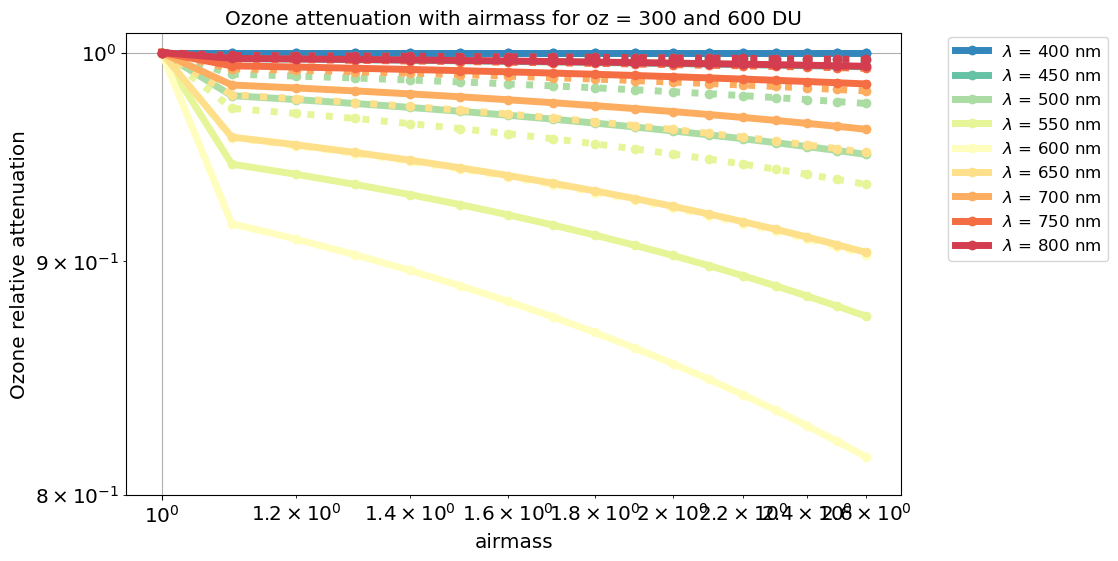

In [25]:
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    label = "$\\lambda$ = "+f"{wl:.0f} nm"
    ax.plot(airmasses,transmarray2[:,idx],'-o',color=color,lw=5,label=label)
    ax.plot(airmasses,transmarray1[:,idx],':o',color=color,lw=5)
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"Ozone attenuation with airmass for oz = 300 and 600 DU")
ax.set_ylabel("Ozone relative attenuation")
ax.set_xlabel("airmass")
ax.set_ylim(0.8,1.01)
ax.set_xscale("log")
ax.set_yscale("log")

## Fit

Text(0.5, 0, 'ln(airmass)')

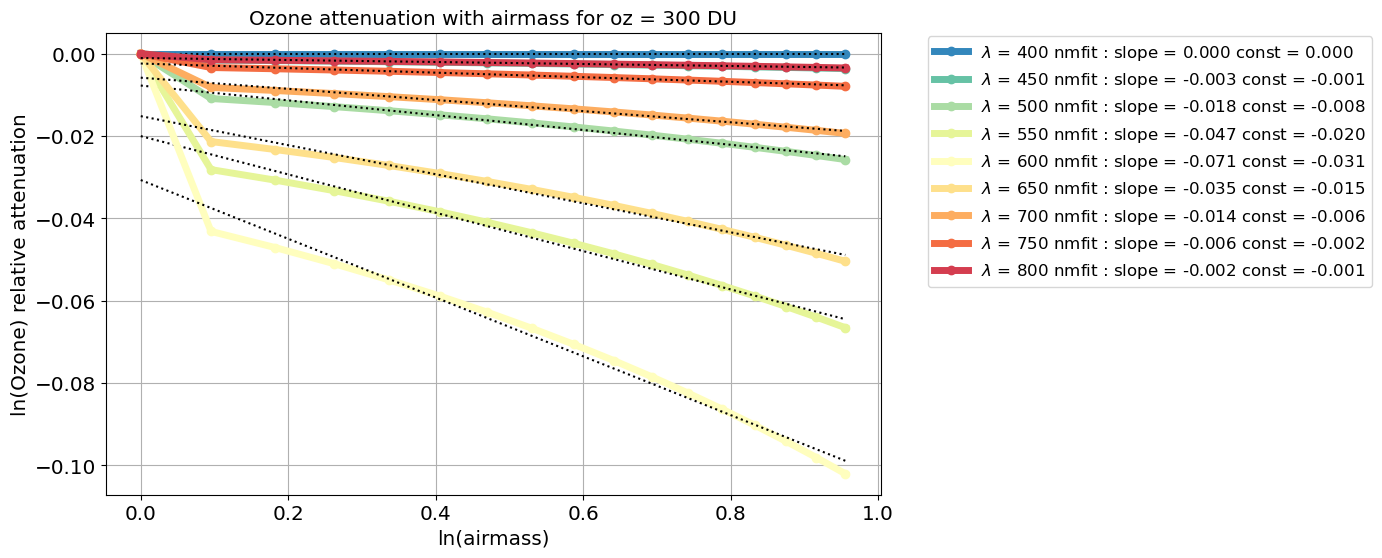

In [26]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x = np.log(airmasses)
    y = np.log(transmarray1[:,idx])
    z = np.polyfit(x[2:], y[2:], deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm"+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x,y,'-o',color=color,lw=5,label=label)
    ax.plot(xfit,p(xfit),":k")
   
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"Ozone attenuation with airmass for oz = 300 DU")
ax.set_ylabel("ln(Ozone) relative attenuation")
ax.set_xlabel("ln(airmass)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")

Text(0.5, 0, 'ln(airmass)')

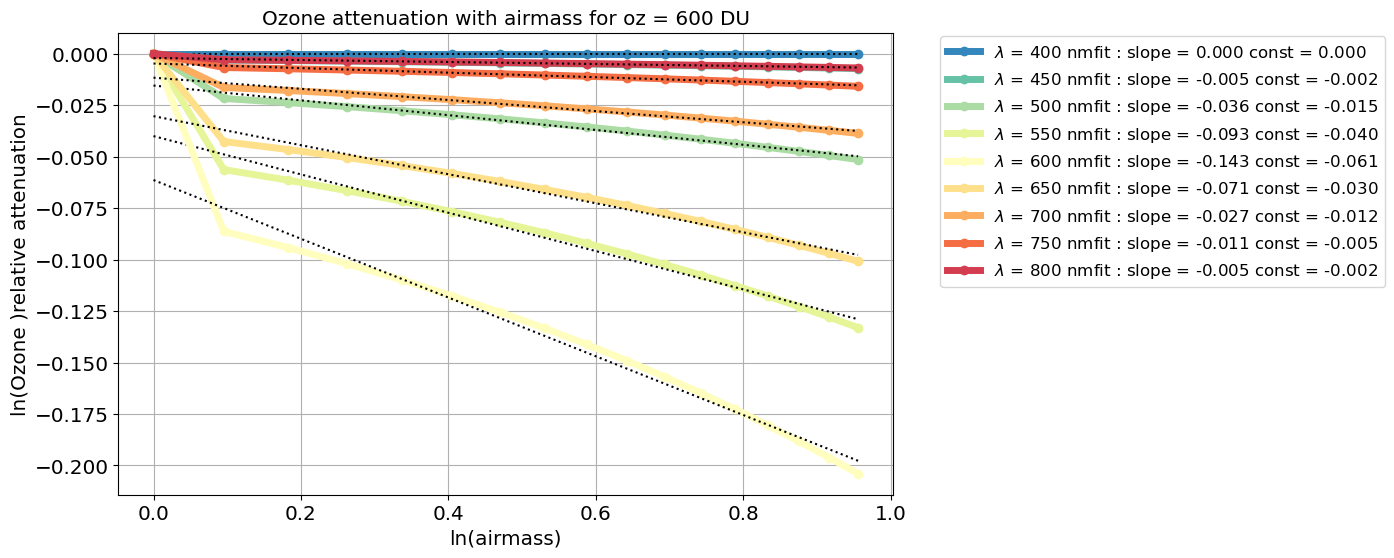

In [27]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x = np.log(airmasses)
    y = np.log(transmarray2[:,idx])
    z = np.polyfit(x[2:], y[2:], deg=1)
    p = np.poly1d(z)
    gamma = z[0]
    const = z[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm"+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x,y,'-o',color=color,lw=5,label=label)
    ax.plot(xfit,p(xfit),":k")
   
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"Ozone attenuation with airmass for oz = 600 DU")
ax.set_ylabel("ln(Ozone )relative attenuation")
ax.set_xlabel("ln(airmass)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")

Text(0.5, 0, 'ln(airmass x OZ/300)')

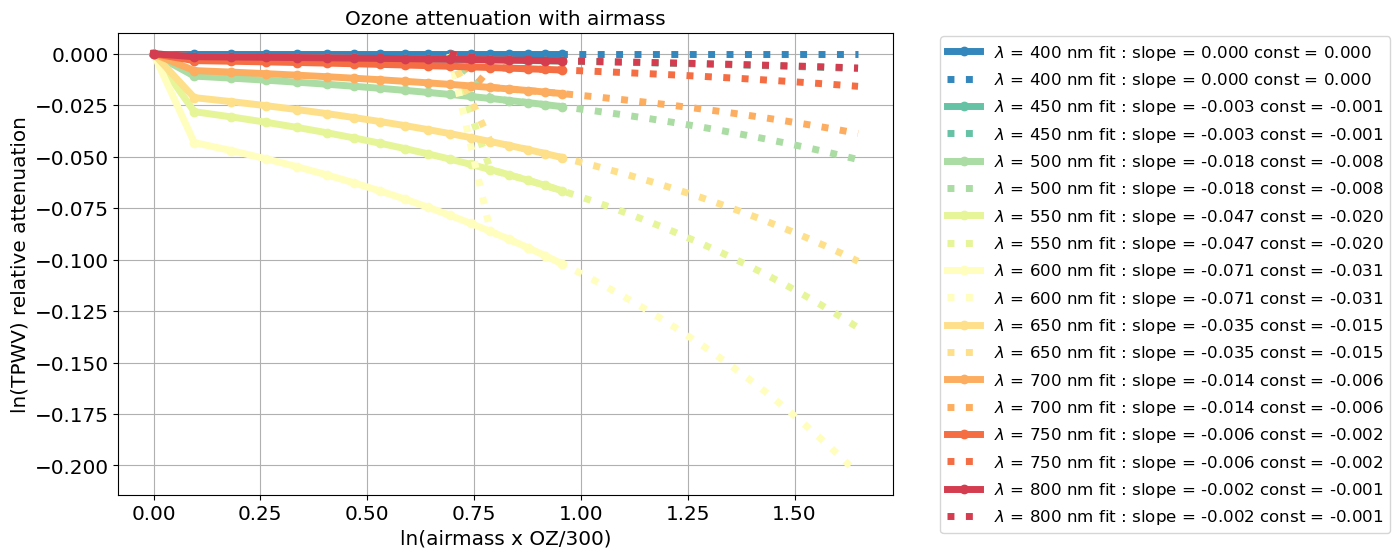

In [28]:
xfit = np.linspace(np.log(airmasses).min(),np.log(airmasses*10).max(),50)
fig, ax = plt.subplots()
for idx,wl in enumerate(WLtest):
    color = hls_colors[idx]
    x1 = np.log(airmasses*300/300)
    y1 = np.log(transmarray1[:,idx])
    z1 = np.polyfit(x1[2:], y1[2:], deg=1)
    p1 = np.poly1d(z1)
    gamma = z1[0]
    const = z1[1]
    label = "$\\lambda$ = "+f"{wl:.0f} nm "+ f"fit : slope = {gamma:.3f} const = {const:.3f}"
    ax.plot(x1,y1,'-o',color=color,lw=5,label=label)
    #ax.plot(xfit,p(xfit),":k")

    x2 = np.log(airmasses*600/300)
    y2 = np.log(transmarray2[:,idx])
    z2 = np.polyfit(x2[2:], y2[2:], deg=1)
    p2 = np.poly1d(z2)
    ax.plot(x2,y2,':',color=color,lw=5,label=label)
    
   
#ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1.01))
ax.grid()
ax.set_title(f"Ozone attenuation with airmass")
ax.set_ylabel("ln(TPWV) relative attenuation")
ax.set_xlabel("ln(airmass x OZ/300)")
#ax.set_ylim(0.8,1.01)
#ax.set_xlim(1,airmasses.max())
#ax.set_xscale("log")
#ax.set_yscale("log")